In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier,
    VotingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## **Data Collection** 

In [4]:
df=pd.read_csv('heart_failure_clinical_records.csv')

## **Data Representation**

In [5]:
df.shape

(5000, 13)

In [6]:
df.head(8)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
5,70.0,0,232,1,30,0,302000.00,1.2,132,1,0,210,0
6,63.0,1,122,1,60,0,172000.00,1.2,145,0,0,147,0
7,70.0,1,171,0,50,1,358000.00,0.9,141,0,0,196,0


In [7]:
df.tail(11)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4989,60.0,1,154,0,25,0,210000.0,1.7,135,1,0,82,1
4990,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209,0
4991,53.0,1,582,0,45,0,305000.0,1.1,137,1,1,209,0
4992,65.0,1,335,0,35,1,235000.0,0.8,136,0,0,120,0
4993,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
4994,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
4995,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.0,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1


In [8]:
df.sample(4)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
2373,50.0,0,582,0,62,1,147000.00,0.80,140,1,1,192,0
139,63.0,0,936,0,50,0,263358.03,1.18,137,1,1,88,0
3012,51.0,0,78,0,50,0,406000.00,0.70,140,1,0,79,0
221,50.0,0,482,1,30,0,200000.00,0.90,132,0,0,109,0


In [9]:
df.iloc[15:20,0:5]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction
15,60.0,1,34,0,20
16,75.0,0,99,1,20
17,66.0,1,68,1,38
18,72.0,1,110,0,25
19,60.0,1,47,1,20


In [10]:
df.loc[[8,9,10,11],['age','anaemia','diabetes']]

,age,anaemia,diabetes
8,50.000,0,1
9,53.000,1,0
10,60.667,1,1
11,72.000,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [12]:
df.dtypes 

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

## **Data Wrangling**

### **Hanlde Missing Values**

In [13]:
df.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isna().sum() 

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### **Data Analysis**

In [15]:
df.head(8)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
5,70.0,0,232,1,30,0,302000.00,1.2,132,1,0,210,0
6,63.0,1,122,1,60,0,172000.00,1.2,145,0,0,147,0
7,70.0,1,171,0,50,1,358000.00,0.9,141,0,0,196,0


### ***age***

In [16]:
df['age']

0       55.0
1       65.0
2       45.0
3       60.0
4       95.0
        ... 
4995    45.0
4996    60.0
4997    95.0
4998    65.0
4999    40.0
Name: age, Length: 5000, dtype: float64

In [17]:
df['age'].value_counts()

age
60.000    581
50.000    496
65.000    439
70.000    407
45.000    327
55.000    276
58.000    187
53.000    187
75.000    172
42.000    156
63.000    134
72.000    126
68.000    112
40.000    101
85.000     88
80.000     86
52.000     85
59.000     71
62.000     68
73.000     65
82.000     58
49.000     55
46.000     55
69.000     54
51.000     54
61.000     50
60.667     46
90.000     41
44.000     41
48.000     40
66.000     40
95.000     37
64.000     36
87.000     24
41.000     23
77.000     23
56.000     22
67.000     21
54.000     17
78.000     17
43.000     14
57.000     13
79.000     12
86.000     12
81.000     11
94.000     11
47.000      8
71.000      1
Name: count, dtype: int64

In [18]:
df['age'].value_counts(normalize=True)*100

age
60.000    11.62
50.000     9.92
65.000     8.78
70.000     8.14
45.000     6.54
55.000     5.52
58.000     3.74
53.000     3.74
75.000     3.44
42.000     3.12
63.000     2.68
72.000     2.52
68.000     2.24
40.000     2.02
85.000     1.76
80.000     1.72
52.000     1.70
59.000     1.42
62.000     1.36
73.000     1.30
82.000     1.16
49.000     1.10
46.000     1.10
69.000     1.08
51.000     1.08
61.000     1.00
60.667     0.92
90.000     0.82
44.000     0.82
48.000     0.80
66.000     0.80
95.000     0.74
64.000     0.72
87.000     0.48
41.000     0.46
77.000     0.46
56.000     0.44
67.000     0.42
54.000     0.34
78.000     0.34
43.000     0.28
57.000     0.26
79.000     0.24
86.000     0.24
81.000     0.22
94.000     0.22
47.000     0.16
71.000     0.02
Name: proportion, dtype: float64

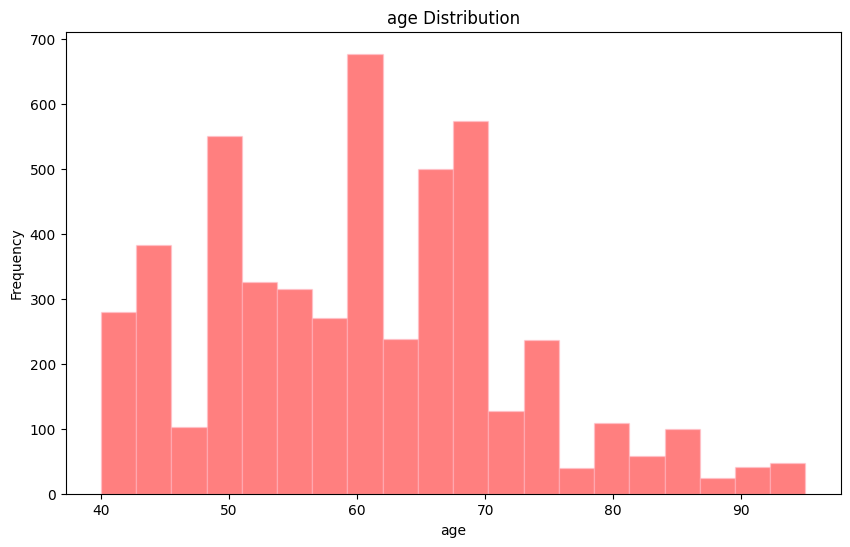

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='red', alpha=0.5, edgecolor='pink')
plt.title('age Distribution')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='Frequency'>

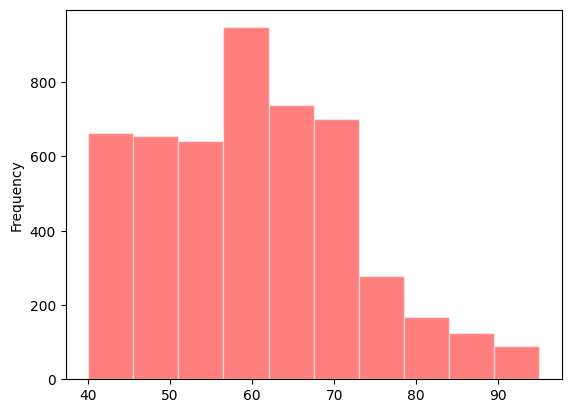

In [20]:
df['age'].plot(kind='hist',color='red', alpha=0.5,edgecolor='white')

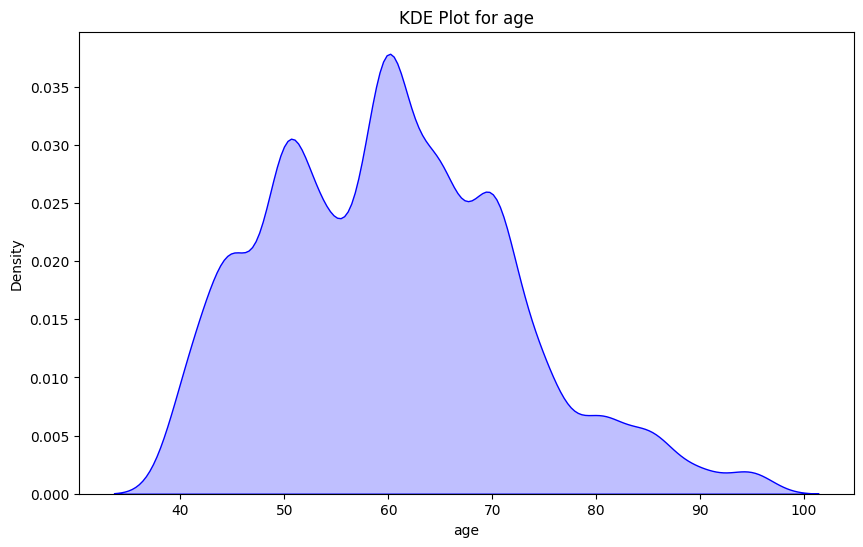

In [21]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['age'], fill=True, color='blue')
plt.title('KDE Plot for age')
plt.show()


In [22]:
search_2= df[(df['age'] >70)&(df['age'] < 90)] 
search_2

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
11,72.0,1,110,0,25,0,237000.00,1.00,140,0,0,65,1
16,75.0,0,99,1,20,1,70000.00,2.30,134,1,0,162,1
18,72.0,1,110,0,25,0,237000.00,1.00,140,0,0,65,1
35,72.0,0,211,1,25,0,318000.00,1.20,134,0,0,207,0
40,75.0,1,246,1,15,0,127000.00,1.20,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,75.0,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
4953,80.0,0,805,0,38,0,263358.03,1.10,134,1,0,109,1
4960,75.0,1,582,0,30,0,225000.00,1.83,134,1,0,113,1
4973,86.0,0,582,0,38,0,263358.03,1.83,134,0,0,95,1


In [23]:
search_1= df[(df['age'] > 90 )][['anaemia','creatinine_phosphokinase','high_blood_pressure']]
search_1

,anaemia,creatinine_phosphokinase,high_blood_pressure
4,1,582,0
39,1,371,0
80,1,281,1
105,0,112,1
145,1,112,1
162,1,112,1
290,1,112,1
304,0,112,1
446,0,582,1
491,1,112,0


In [24]:
search_1= df[(df['age'] < 90 )][['anaemia','creatinine_phosphokinase','high_blood_pressure']]
search_1

,anaemia,creatinine_phosphokinase,high_blood_pressure
0,0,748,0
1,0,56,0
2,0,582,0
3,1,754,1
5,0,232,0
...,...,...,...
4994,1,160,0
4995,0,582,0
4996,1,582,1
4998,1,160,0


### ***anaemia***

In [25]:
df['anaemia']

0       0
1       0
2       0
3       1
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    0
Name: anaemia, Length: 5000, dtype: int64

In [26]:
df['anaemia'].value_counts()

anaemia
0    2628
1    2372
Name: count, dtype: int64

In [27]:
df['anaemia'].value_counts(normalize=True)*100

anaemia
0    52.56
1    47.44
Name: proportion, dtype: float64

C:\Users\Asus\AppData\Local\Temp\ipykernel_3516\1424389198.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['anaemia'].value_counts().index, y=df['anaemia'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
C:\Users\Asus\AppData\Local\Temp\ipykernel_3516\1424389198.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x=df['anaemia'].value_counts().index, y=df['anaemia'].value_counts().values, color='green', palette=sns.color_palette("Set2"))


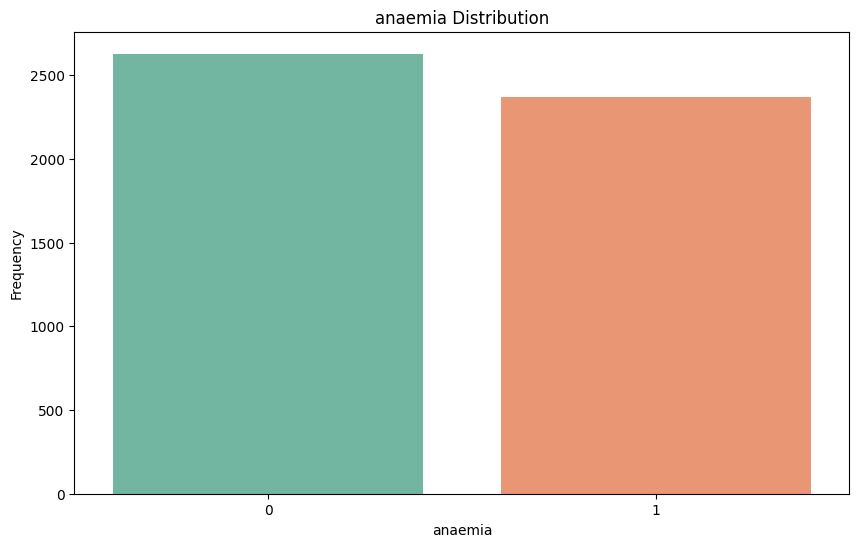

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['anaemia'].value_counts().index, y=df['anaemia'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
plt.title('anaemia Distribution')
plt.xlabel('anaemia')
plt.ylabel('Frequency')
plt.show()

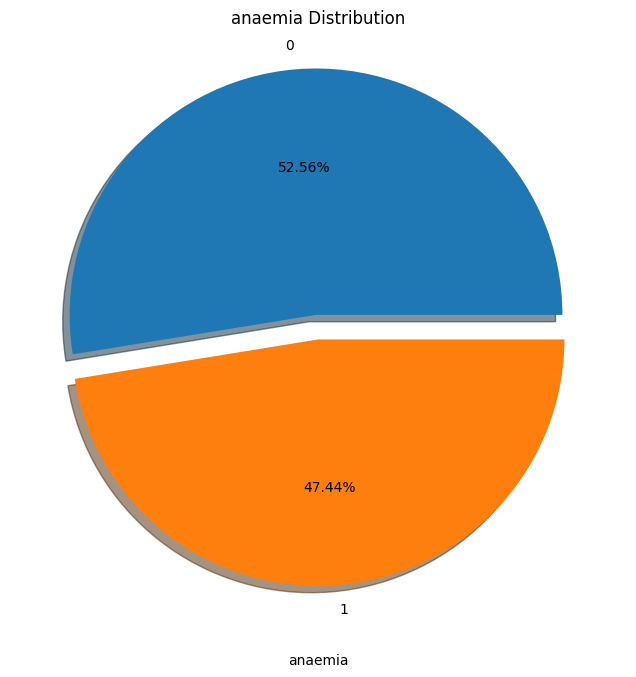

In [29]:
plt.figure(figsize=(8,8))
anaemia_counts = df['anaemia'].value_counts()
plt.pie(df['anaemia'].value_counts(),
        explode = [0.1 if i == anaemia_counts.argmax() else 0 for i in range(len(anaemia_counts))],
        labels=df['anaemia'].value_counts().index, 
        shadow=True,
        autopct="%1.2f%%"
       )
plt.title('anaemia Distribution')
plt.xlabel('anaemia')
plt.show()

### ***creatinine_phosphokinase***

In [30]:
df['creatinine_phosphokinase']

0       748
1        56
2       582
3       754
4       582
       ... 
4995    582
4996    582
4997    112
4998    160
4999    244
Name: creatinine_phosphokinase, Length: 5000, dtype: int64

In [31]:
df['creatinine_phosphokinase'].value_counts()

creatinine_phosphokinase
582     769
66       73
129      70
102      65
68       61
       ... 
290       1
366       1
784       1
1907      1
807       1
Name: count, Length: 290, dtype: int64

In [32]:
df['creatinine_phosphokinase'].value_counts(normalize=True)*100

creatinine_phosphokinase
582     15.38
66       1.46
129      1.40
102      1.30
68       1.22
        ...  
290      0.02
366      0.02
784      0.02
1907     0.02
807      0.02
Name: proportion, Length: 290, dtype: float64

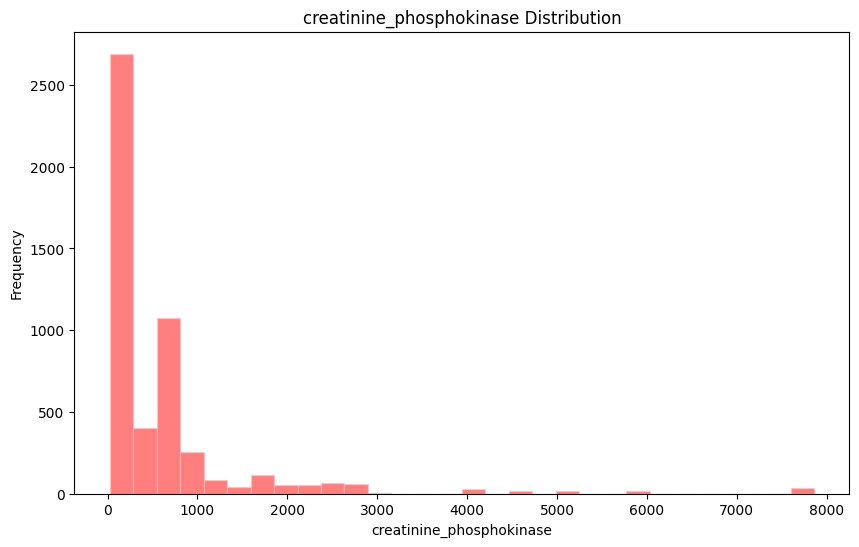

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(df['creatinine_phosphokinase'], bins=30, color='red', alpha=0.5, edgecolor='pink')
plt.title('creatinine_phosphokinase Distribution')
plt.xlabel('creatinine_phosphokinase')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='Frequency'>

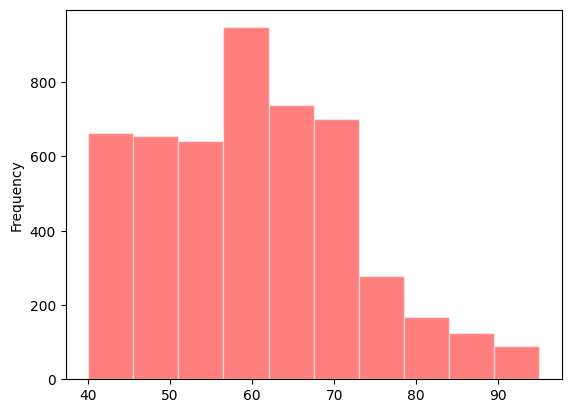

In [34]:
df['age'].plot(kind='hist',color='red', alpha=0.5,edgecolor='white')

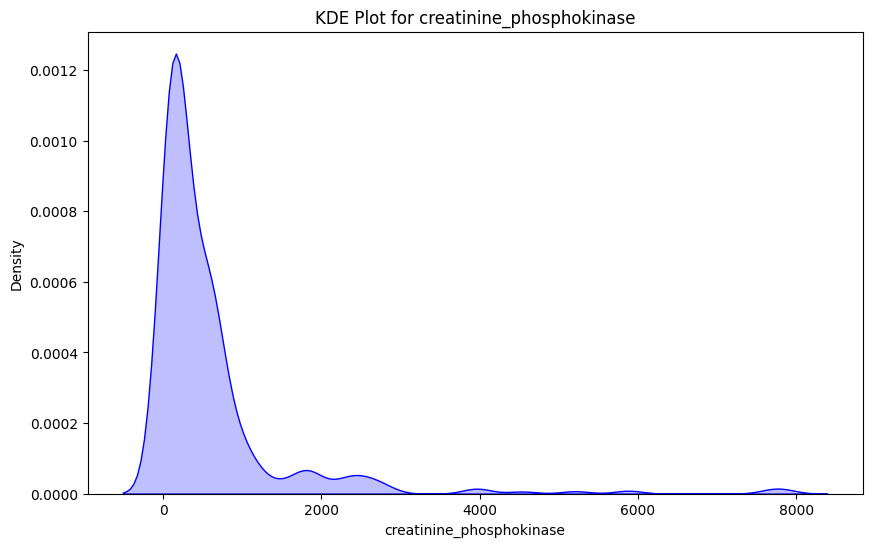

In [35]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['creatinine_phosphokinase'], fill=True, color='blue')
plt.title('KDE Plot for creatinine_phosphokinase')
plt.show()


### ***diabetes***

In [36]:
df['diabetes']

0       0
1       0
2       1
3       1
4       0
       ..
4995    1
4996    0
4997    0
4998    1
4999    0
Name: diabetes, Length: 5000, dtype: int64

In [37]:
df['diabetes'].value_counts()

diabetes
0    2803
1    2197
Name: count, dtype: int64

In [38]:
df['diabetes'].value_counts(normalize=True)*100

diabetes
0    56.06
1    43.94
Name: proportion, dtype: float64

C:\Users\Asus\AppData\Local\Temp\ipykernel_3516\3160922250.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['diabetes'].value_counts().index, y=df['diabetes'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
C:\Users\Asus\AppData\Local\Temp\ipykernel_3516\3160922250.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x=df['diabetes'].value_counts().index, y=df['diabetes'].value_counts().values, color='green', palette=sns.color_palette("Set2"))


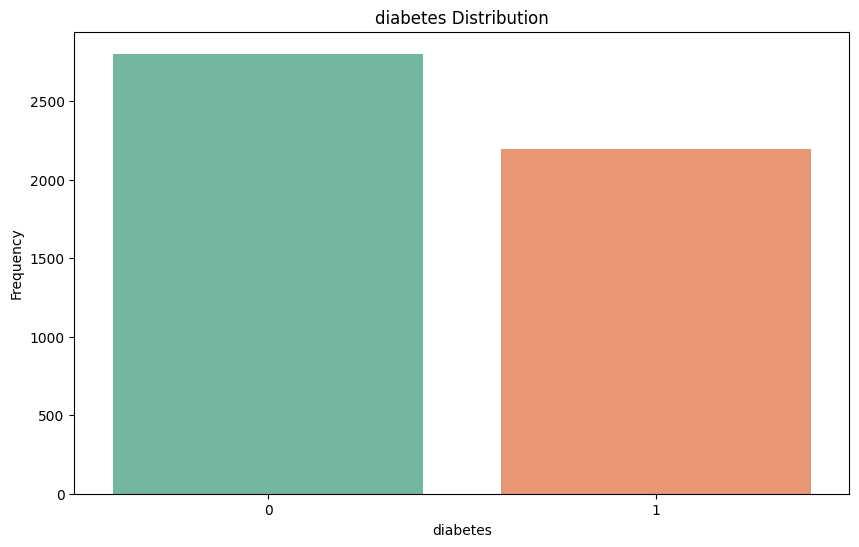

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['diabetes'].value_counts().index, y=df['diabetes'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
plt.title('diabetes Distribution')
plt.xlabel('diabetes')
plt.ylabel('Frequency')
plt.show()

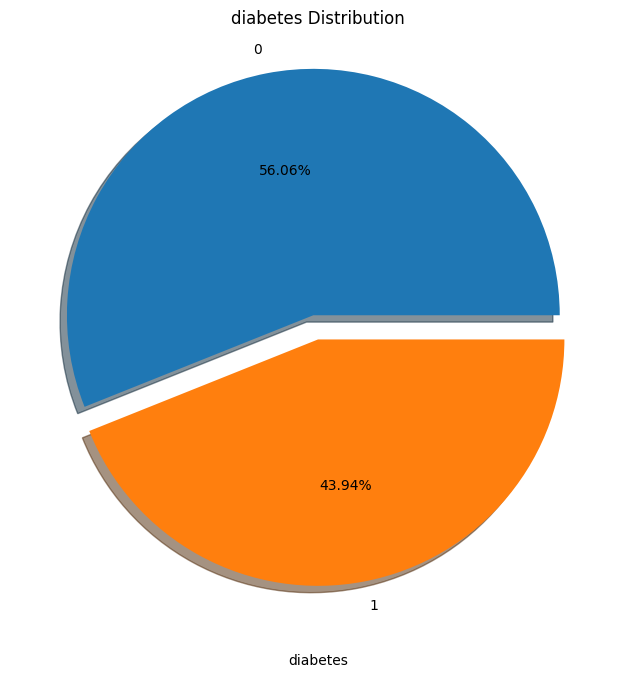

In [40]:
plt.figure(figsize=(12,8))
diabetes_counts = df['diabetes'].value_counts()
plt.pie(df['diabetes'].value_counts(),
        explode = [0.1 if i == anaemia_counts.argmax() else 0 for i in range(len(diabetes_counts))],
        labels=df['diabetes'].value_counts().index, 
        shadow=True,
        autopct="%1.2f%%"
       )
plt.title('diabetes Distribution')
plt.xlabel('diabetes')
plt.show()

### ***ejection_fraction***


In [41]:
df['ejection_fraction']

0       45
1       25
2       38
3       40
4       30
        ..
4995    55
4996    30
4997    40
4998    20
4999    45
Name: ejection_fraction, Length: 5000, dtype: int64

In [42]:
df['ejection_fraction'].value_counts()

ejection_fraction
35    771
40    709
38    628
30    599
25    591
60    485
45    353
50    345
20    325
55     48
15     44
17     33
62     26
65     15
70     11
14      9
80      8
Name: count, dtype: int64

In [43]:
df['ejection_fraction'].value_counts(normalize=True)*100

ejection_fraction
35    15.42
40    14.18
38    12.56
30    11.98
25    11.82
60     9.70
45     7.06
50     6.90
20     6.50
55     0.96
15     0.88
17     0.66
62     0.52
65     0.30
70     0.22
14     0.18
80     0.16
Name: proportion, dtype: float64

C:\Users\Asus\AppData\Local\Temp\ipykernel_3516\1391323955.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['ejection_fraction'].value_counts().index, y=df['ejection_fraction'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
C:\Users\Asus\AppData\Local\Temp\ipykernel_3516\1391323955.py:2: UserWarning: 
The palette list has fewer values (8) than needed (17) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=df['ejection_fraction'].value_counts().index, y=df['ejection_fraction'].value_counts().values, color='green', palette=sns.color_palette("Set2"))


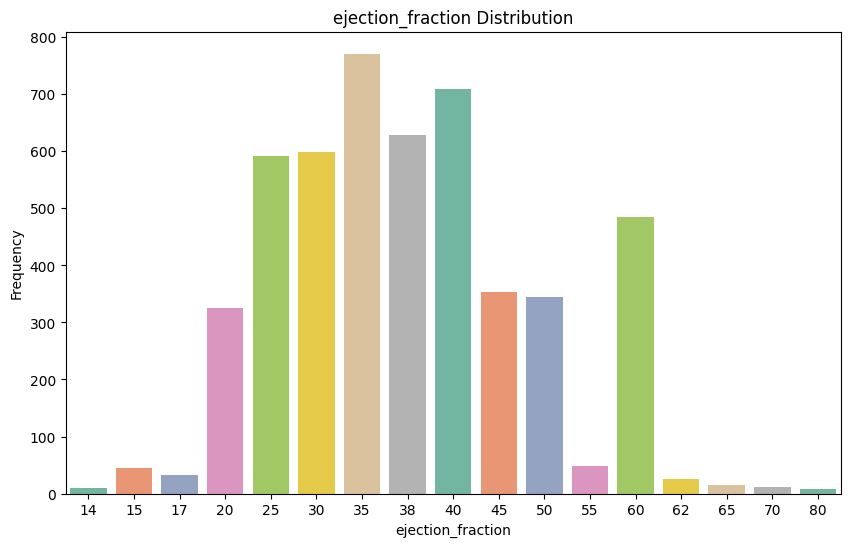

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['ejection_fraction'].value_counts().index, y=df['ejection_fraction'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
plt.title('ejection_fraction Distribution')
plt.xlabel('ejection_fraction')
plt.ylabel('Frequency')
plt.show()

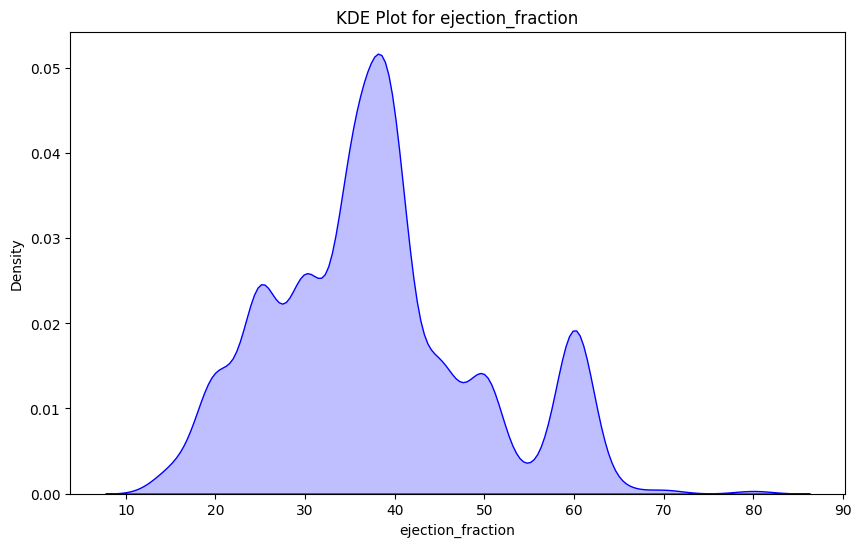

In [45]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['ejection_fraction'], fill=True, color='blue')
plt.title('KDE Plot for ejection_fraction')
plt.show()


### ***high_blood_pressure***


In [46]:
df['high_blood_pressure']

0       0
1       0
2       0
3       1
4       0
       ..
4995    0
4996    1
4997    1
4998    0
4999    1
Name: high_blood_pressure, Length: 5000, dtype: int64

In [47]:
df['high_blood_pressure'].value_counts()

high_blood_pressure
0    3176
1    1824
Name: count, dtype: int64

In [48]:
df['high_blood_pressure'].value_counts(normalize=True)*100

high_blood_pressure
0    63.52
1    36.48
Name: proportion, dtype: float64

C:\Users\Asus\AppData\Local\Temp\ipykernel_3516\366734703.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['high_blood_pressure'].value_counts().index, y=df['high_blood_pressure'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
C:\Users\Asus\AppData\Local\Temp\ipykernel_3516\366734703.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x=df['high_blood_pressure'].value_counts().index, y=df['high_blood_pressure'].value_counts().values, color='green', palette=sns.color_palette("Set2"))


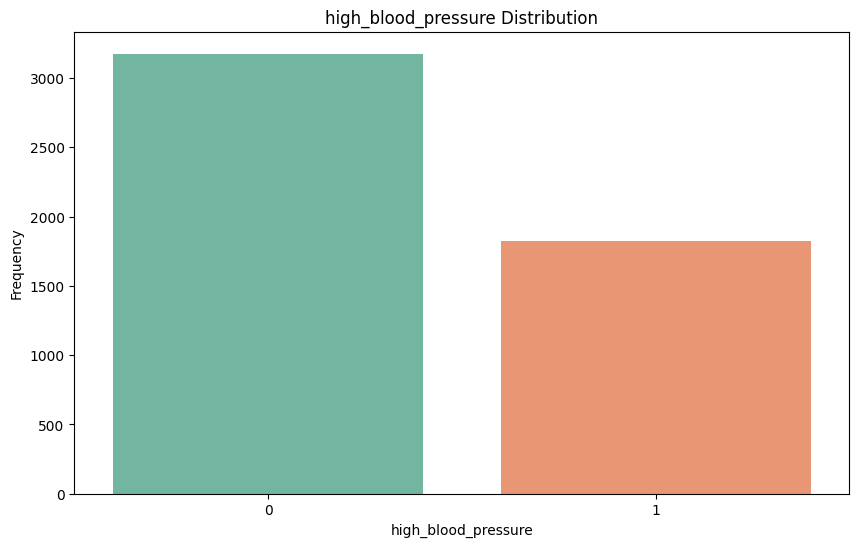

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['high_blood_pressure'].value_counts().index, y=df['high_blood_pressure'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
plt.title('high_blood_pressure Distribution')
plt.xlabel('high_blood_pressure')
plt.ylabel('Frequency')
plt.show()

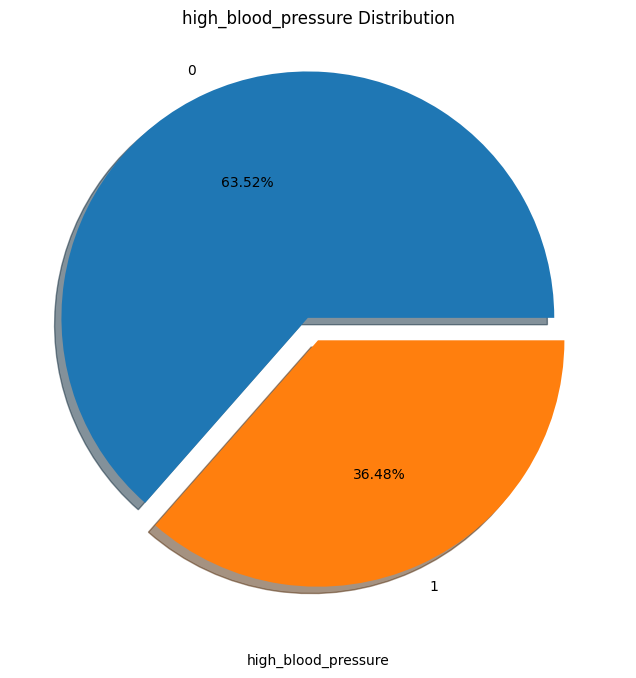

In [50]:
plt.figure(figsize=(8,8))
high_blood_pressure_counts = df['high_blood_pressure'].value_counts()
plt.pie(df['high_blood_pressure'].value_counts(),
        explode = [0.1 if i == anaemia_counts.argmax() else 0 for i in range(len(high_blood_pressure_counts))],
        labels=df['high_blood_pressure'].value_counts().index, 
        shadow=True,
        autopct="%1.2f%%"
       )
plt.title('high_blood_pressure Distribution')
plt.xlabel('high_blood_pressure')
plt.show()

### ***platelets***


In [51]:
df['platelets']

0       263358.03
1       305000.00
2       319000.00
3       328000.00
4       461000.00
          ...    
4995    543000.00
4996    127000.00
4997    196000.00
4998    327000.00
4999    275000.00
Name: platelets, Length: 5000, dtype: float64

In [52]:
df['platelets'].value_counts()

platelets
263358.03    395
226000.00     82
255000.00     80
305000.00     78
237000.00     73
            ... 
28100.00       1
123000.00      1
36000.00       1
28300.00       1
273000.00      1
Name: count, Length: 203, dtype: int64

In [53]:
df['platelets'].value_counts(normalize=True)*100

platelets
263358.03    7.90
226000.00    1.64
255000.00    1.60
305000.00    1.56
237000.00    1.46
             ... 
28100.00     0.02
123000.00    0.02
36000.00     0.02
28300.00     0.02
273000.00    0.02
Name: proportion, Length: 203, dtype: float64

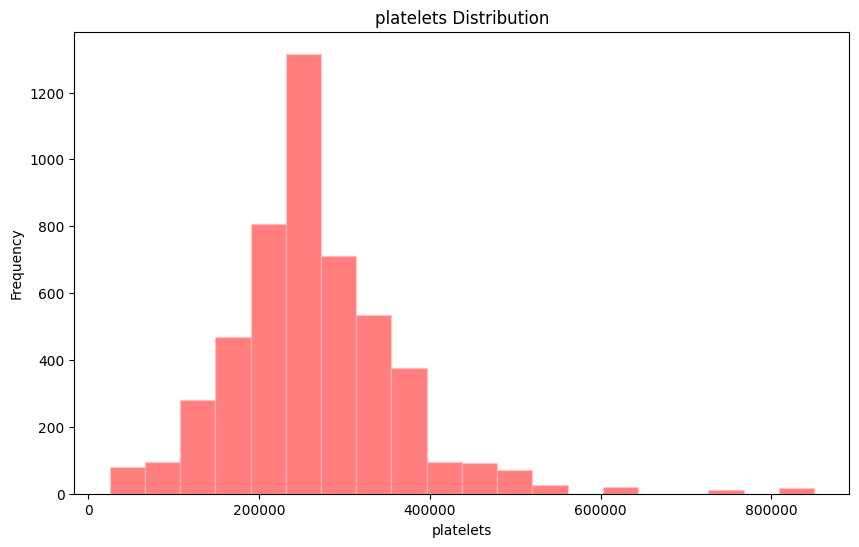

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(df['platelets'], bins=20, color='red', alpha=0.5, edgecolor='pink')
plt.title('platelets Distribution')
plt.xlabel('platelets')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='Frequency'>

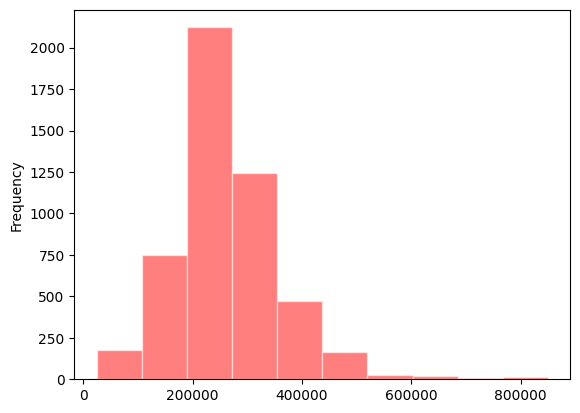

In [55]:
df['platelets'].plot(kind='hist',color='red', alpha=0.5,edgecolor='white')

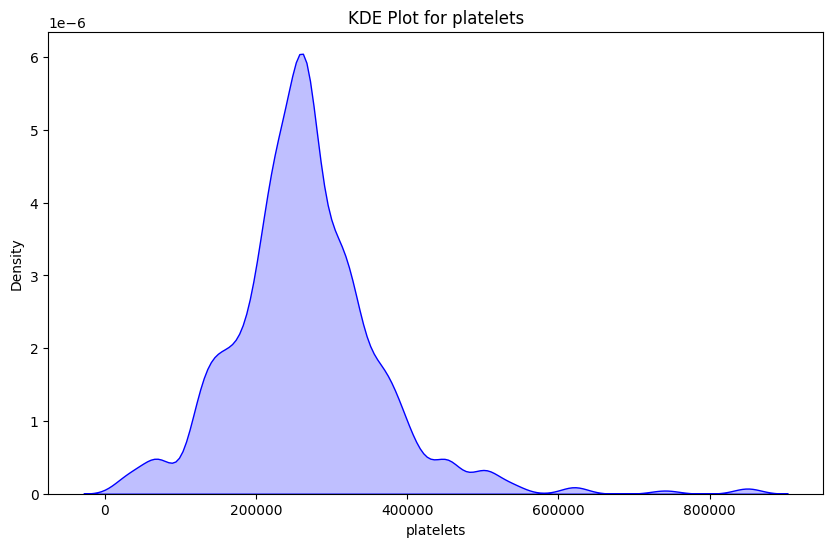

In [56]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['platelets'], fill=True, color='blue')
plt.title('KDE Plot for platelets')
plt.show()


### ***serum_creatinine***

In [57]:
df['serum_creatinine']

0       1.3
1       5.0
2       0.9
3       1.2
4       2.0
       ... 
4995    1.0
4996    0.9
4997    1.0
4998    2.7
4999    0.9
Name: serum_creatinine, Length: 5000, dtype: float64

In [58]:
df['serum_creatinine'].value_counts()

serum_creatinine
1.00    841
1.10    585
0.90    569
1.20    466
0.80    366
0.70    333
1.30    307
1.18    166
1.70    156
1.60    131
1.83    121
1.40     95
1.50     79
1.90     76
0.60     72
2.10     71
2.30     59
2.70     43
1.80     40
3.50     39
2.50     32
2.40     29
2.90     27
4.00     25
0.50     24
2.20     23
2.00     22
3.70     22
9.40     21
3.40     20
3.00     20
6.10     20
3.20     17
0.75     16
6.80     15
5.00     14
9.00     11
4.40     10
5.80      9
3.80      5
6.30      1
0.85      1
1.07      1
Name: count, dtype: int64

In [59]:
df['serum_creatinine'].value_counts(normalize=True)*100

serum_creatinine
1.00    16.82
1.10    11.70
0.90    11.38
1.20     9.32
0.80     7.32
0.70     6.66
1.30     6.14
1.18     3.32
1.70     3.12
1.60     2.62
1.83     2.42
1.40     1.90
1.50     1.58
1.90     1.52
0.60     1.44
2.10     1.42
2.30     1.18
2.70     0.86
1.80     0.80
3.50     0.78
2.50     0.64
2.40     0.58
2.90     0.54
4.00     0.50
0.50     0.48
2.20     0.46
2.00     0.44
3.70     0.44
9.40     0.42
3.40     0.40
3.00     0.40
6.10     0.40
3.20     0.34
0.75     0.32
6.80     0.30
5.00     0.28
9.00     0.22
4.40     0.20
5.80     0.18
3.80     0.10
6.30     0.02
0.85     0.02
1.07     0.02
Name: proportion, dtype: float64

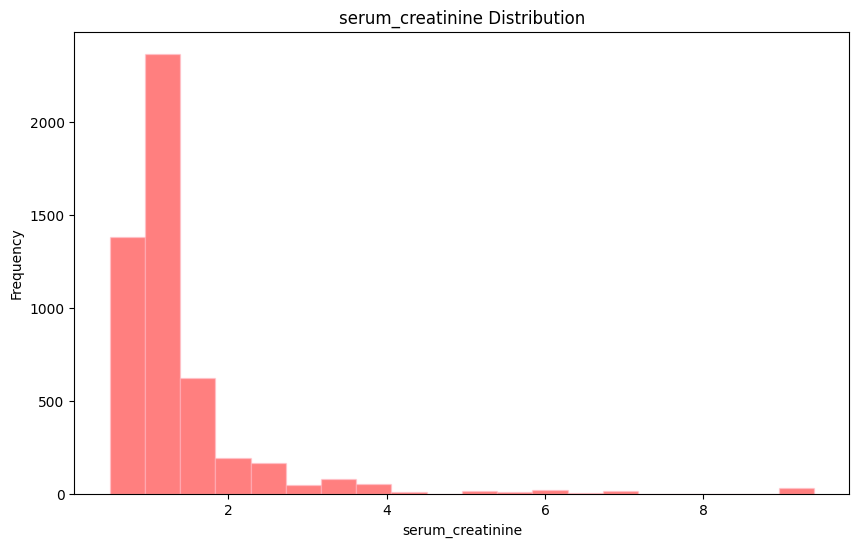

In [60]:
plt.figure(figsize=(10, 6))
plt.hist(df['serum_creatinine'], bins=20, color='red', alpha=0.5, edgecolor='pink')
plt.title('serum_creatinine Distribution')
plt.xlabel('serum_creatinine')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='Frequency'>

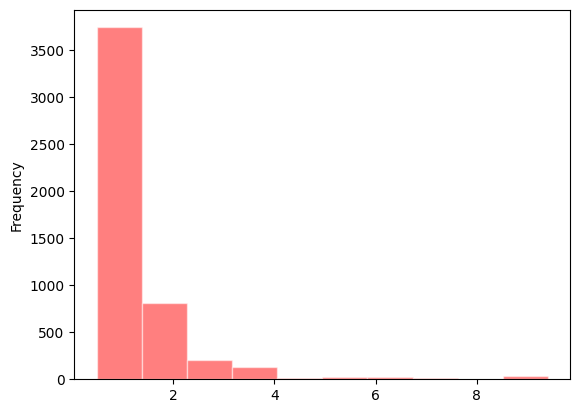

In [61]:
df['serum_creatinine'].plot(kind='hist',color='red', alpha=0.5,edgecolor='white')

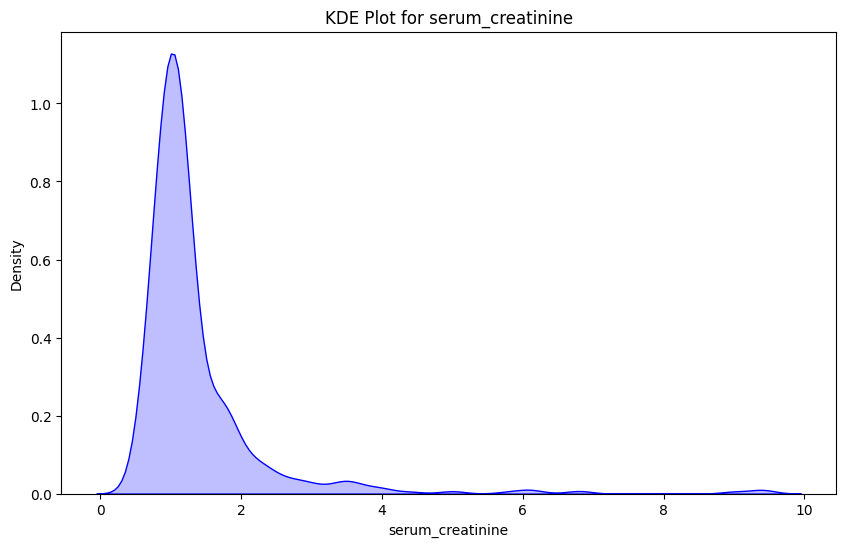

In [62]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['serum_creatinine'], fill=True, color='blue')
plt.title('KDE Plot for serum_creatinine')
plt.show()


### ***serum_sodium***

In [63]:
df['serum_sodium']

0       137
1       130
2       140
3       126
4       132
       ... 
4995    132
4996    145
4997    138
4998    116
4999    140
Name: serum_sodium, Length: 5000, dtype: int64

In [64]:
df['serum_sodium'].value_counts()

serum_sodium
137    641
140    624
136    618
134    525
138    411
139    375
141    243
135    213
145    204
132    201
130    189
142    179
133    134
131    101
144     67
127     42
129     38
143     38
128     24
116     24
148     23
126     22
146     15
121     14
124     13
113     12
125     10
Name: count, dtype: int64

In [65]:
df['serum_sodium'].value_counts(normalize=True)*100

serum_sodium
137    12.82
140    12.48
136    12.36
134    10.50
138     8.22
139     7.50
141     4.86
135     4.26
145     4.08
132     4.02
130     3.78
142     3.58
133     2.68
131     2.02
144     1.34
127     0.84
129     0.76
143     0.76
128     0.48
116     0.48
148     0.46
126     0.44
146     0.30
121     0.28
124     0.26
113     0.24
125     0.20
Name: proportion, dtype: float64

C:\Users\Asus\AppData\Local\Temp\ipykernel_3516\2759318279.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['serum_sodium'].value_counts().index, y=df['serum_sodium'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
C:\Users\Asus\AppData\Local\Temp\ipykernel_3516\2759318279.py:2: UserWarning: 
The palette list has fewer values (8) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=df['serum_sodium'].value_counts().index, y=df['serum_sodium'].value_counts().values, color='green', palette=sns.color_palette("Set2"))


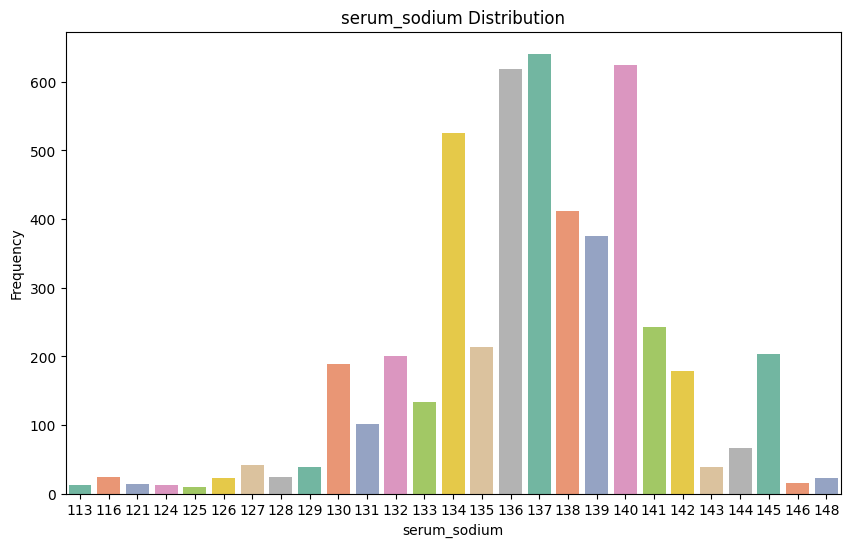

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['serum_sodium'].value_counts().index, y=df['serum_sodium'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
plt.title('serum_sodium Distribution')
plt.xlabel('serum_sodium')
plt.ylabel('Frequency')
plt.show()

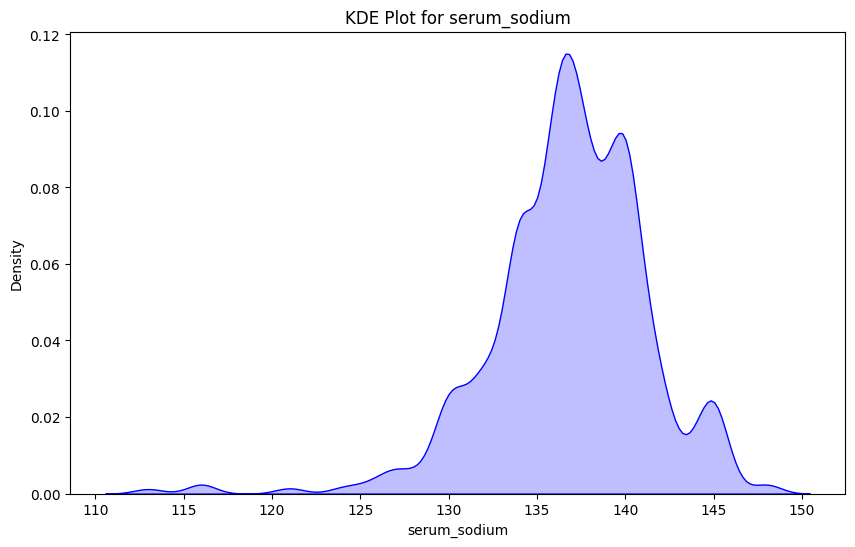

In [67]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['serum_sodium'], fill=True, color='blue')
plt.title('KDE Plot for serum_sodium')
plt.show()


### ***sex***

In [68]:
df['sex']

0       1
1       1
2       0
3       1
4       1
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: sex, Length: 5000, dtype: int64

In [69]:
df['sex'].value_counts()

sex
1    3228
0    1772
Name: count, dtype: int64

In [70]:
df['sex'].value_counts(normalize=True)*100

sex
1    64.56
0    35.44
Name: proportion, dtype: float64

C:\Users\Asus\AppData\Local\Temp\ipykernel_3516\134625423.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['sex'].value_counts().index, y=df['sex'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
C:\Users\Asus\AppData\Local\Temp\ipykernel_3516\134625423.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x=df['sex'].value_counts().index, y=df['sex'].value_counts().values, color='green', palette=sns.color_palette("Set2"))


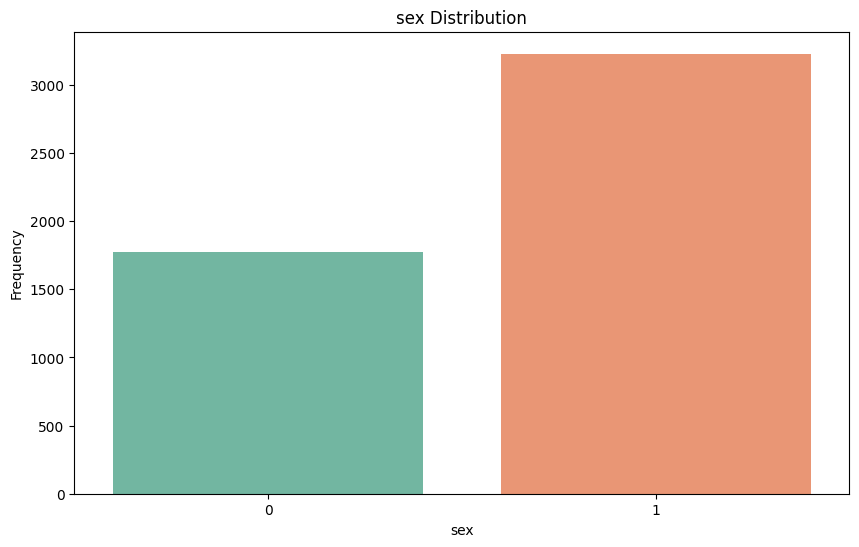

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['sex'].value_counts().index, y=df['sex'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
plt.title('sex Distribution')
plt.xlabel('sex')
plt.ylabel('Frequency')
plt.show()

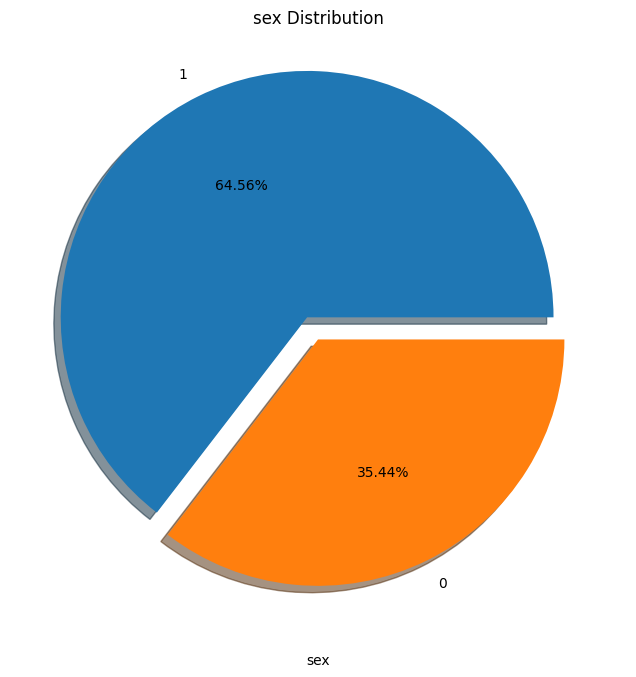

In [72]:
plt.figure(figsize=(12,8))
sex_counts = df['sex'].value_counts()
plt.pie(df['sex'].value_counts(),
        explode = [0.1 if i == anaemia_counts.argmax() else 0 for i in range(len(sex_counts))],
        labels=df['sex'].value_counts().index, 
        shadow=True,
        autopct="%1.2f%%"
       )
plt.title('sex Distribution')
plt.xlabel('sex')
plt.show()

### ***smoking***

In [73]:
df['smoking']

0       1
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: smoking, Length: 5000, dtype: int64

In [74]:
df['smoking'].value_counts()

smoking
0    3441
1    1559
Name: count, dtype: int64

In [75]:
df['smoking'].value_counts(normalize=True)*100

smoking
0    68.82
1    31.18
Name: proportion, dtype: float64

C:\Users\Asus\AppData\Local\Temp\ipykernel_3516\455242956.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['smoking'].value_counts().index, y=df['smoking'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
C:\Users\Asus\AppData\Local\Temp\ipykernel_3516\455242956.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x=df['smoking'].value_counts().index, y=df['smoking'].value_counts().values, color='green', palette=sns.color_palette("Set2"))


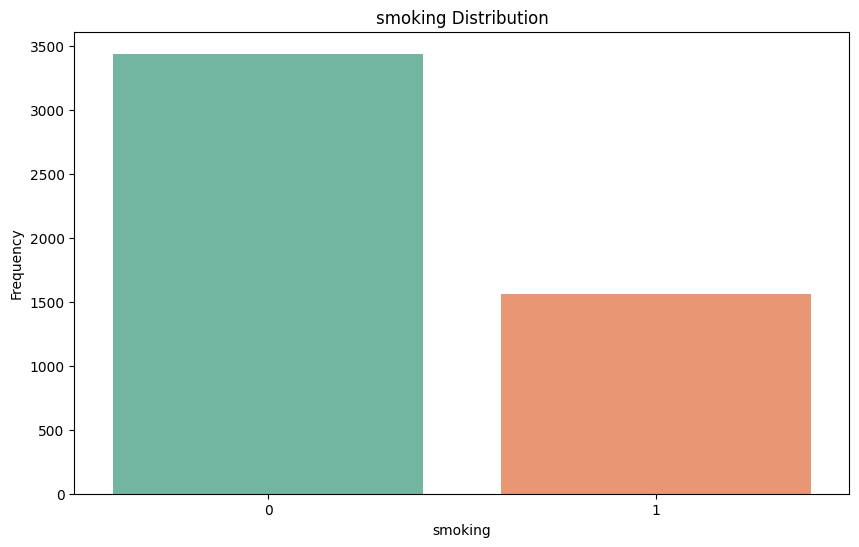

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['smoking'].value_counts().index, y=df['smoking'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
plt.title('smoking Distribution')
plt.xlabel('smoking')
plt.ylabel('Frequency')
plt.show()

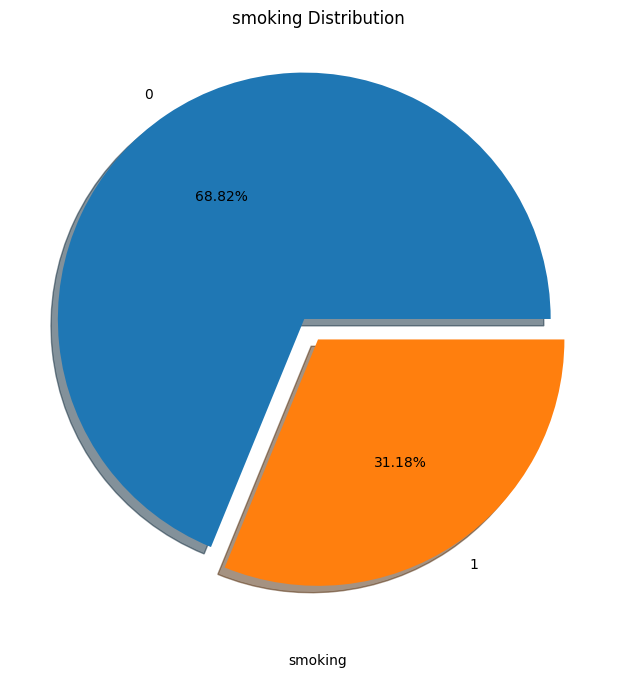

In [77]:
plt.figure(figsize=(12,8))
smoking_counts = df['smoking'].value_counts()
plt.pie(df['smoking'].value_counts(),
        explode = [0.1 if i == anaemia_counts.argmax() else 0 for i in range(len(smoking_counts))],
        labels=df['smoking'].value_counts().index, 
        shadow=True,
        autopct="%1.2f%%"
       )
plt.title('smoking Distribution')
plt.xlabel('smoking')
plt.show()

### ***time***

In [78]:
df['time']

0        88
1       207
2       244
3        90
4        50
       ... 
4995    250
4996     95
4997     24
4998      8
4999    174
Name: time, Length: 5000, dtype: int64

In [79]:
df['time'].value_counts()

time
74     128
187    114
30     114
10     113
244    108
      ... 
242      1
102      1
21       1
116      1
103      1
Name: count, Length: 155, dtype: int64

In [80]:
df['time'].value_counts(normalize=True)*100

time
74     2.56
187    2.28
30     2.28
10     2.26
244    2.16
       ... 
242    0.02
102    0.02
21     0.02
116    0.02
103    0.02
Name: proportion, Length: 155, dtype: float64

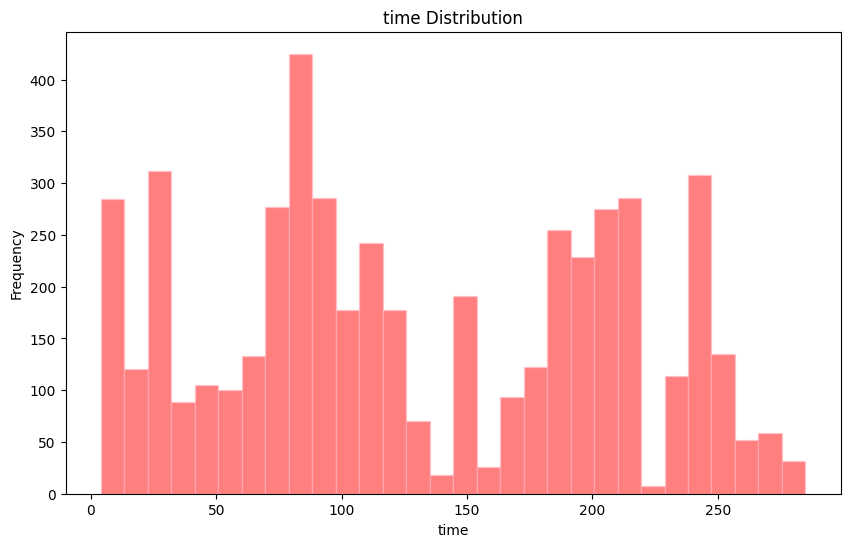

In [81]:
plt.figure(figsize=(10, 6))
plt.hist(df['time'], bins=30, color='red', alpha=0.5, edgecolor='pink')
plt.title('time Distribution')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='Frequency'>

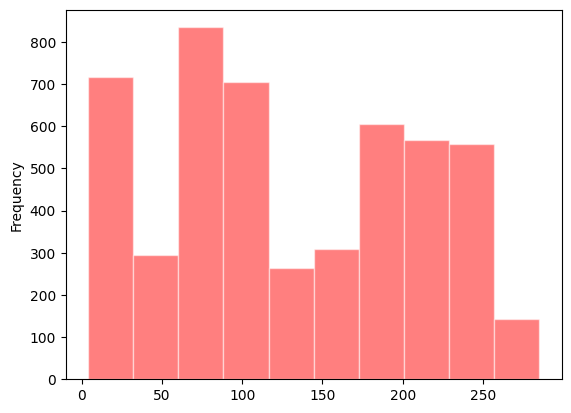

In [82]:
df['time'].plot(kind='hist',color='red', alpha=0.5,edgecolor='white')

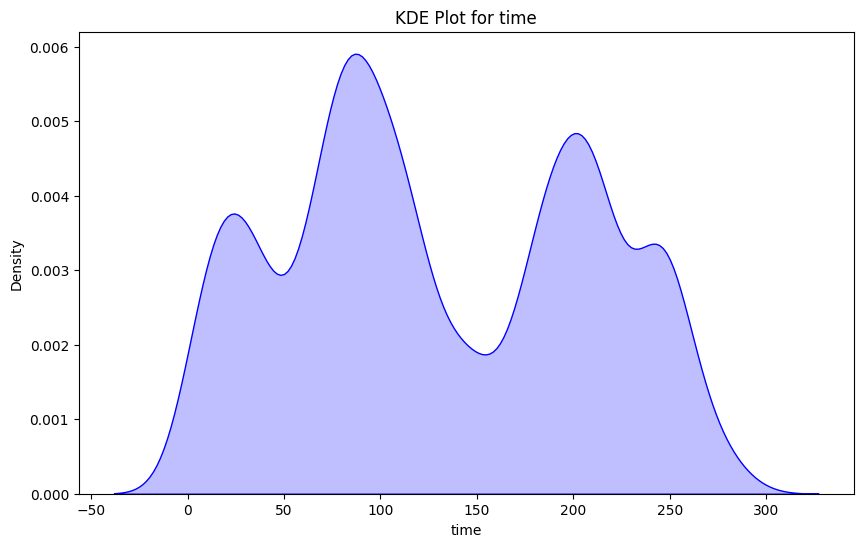

In [83]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['time'], fill=True, color='blue')
plt.title('KDE Plot for time')
plt.show()


### ***DEATH_EVENT***


In [84]:
df['DEATH_EVENT']

0       0
1       0
2       0
3       0
4       1
       ..
4995    0
4996    0
4997    1
4998    1
4999    0
Name: DEATH_EVENT, Length: 5000, dtype: int64

In [85]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    3432
1    1568
Name: count, dtype: int64

In [86]:
df['DEATH_EVENT'].value_counts(normalize=True)*100

DEATH_EVENT
0    68.64
1    31.36
Name: proportion, dtype: float64

C:\Users\Asus\AppData\Local\Temp\ipykernel_3516\3941469881.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['DEATH_EVENT'].value_counts().index, y=df['DEATH_EVENT'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
C:\Users\Asus\AppData\Local\Temp\ipykernel_3516\3941469881.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x=df['DEATH_EVENT'].value_counts().index, y=df['DEATH_EVENT'].value_counts().values, color='green', palette=sns.color_palette("Set2"))


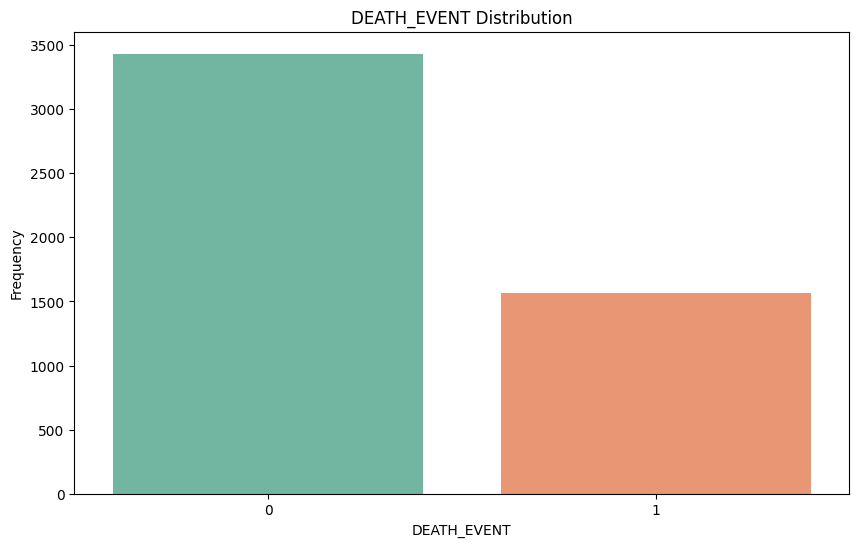

In [87]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['DEATH_EVENT'].value_counts().index, y=df['DEATH_EVENT'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
plt.title('DEATH_EVENT Distribution')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Frequency')
plt.show()

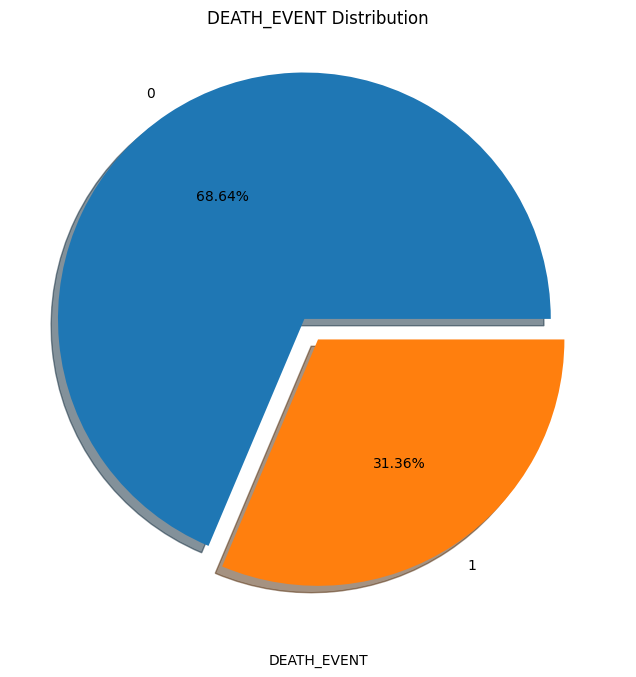

In [88]:
plt.figure(figsize=(12,8))
DEATH_EVENT_counts = df['DEATH_EVENT'].value_counts()
plt.pie(df['DEATH_EVENT'].value_counts(),
        explode = [0.1 if i == anaemia_counts.argmax() else 0 for i in range(len(DEATH_EVENT_counts))],
        labels=df['DEATH_EVENT'].value_counts().index, 
        shadow=True,
        autopct="%1.2f%%"
       )
plt.title('DEATH_EVENT Distribution')
plt.xlabel('DEATH_EVENT')
plt.show()

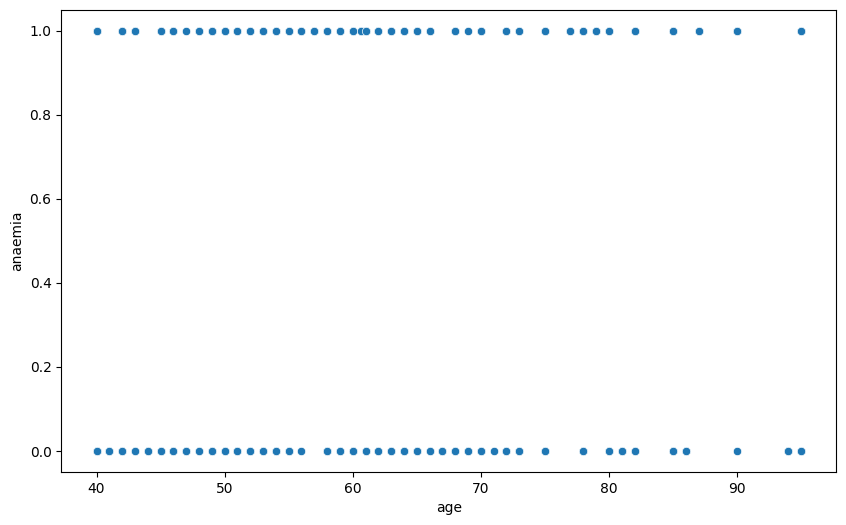

In [89]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='anaemia', data=df)
plt.show()



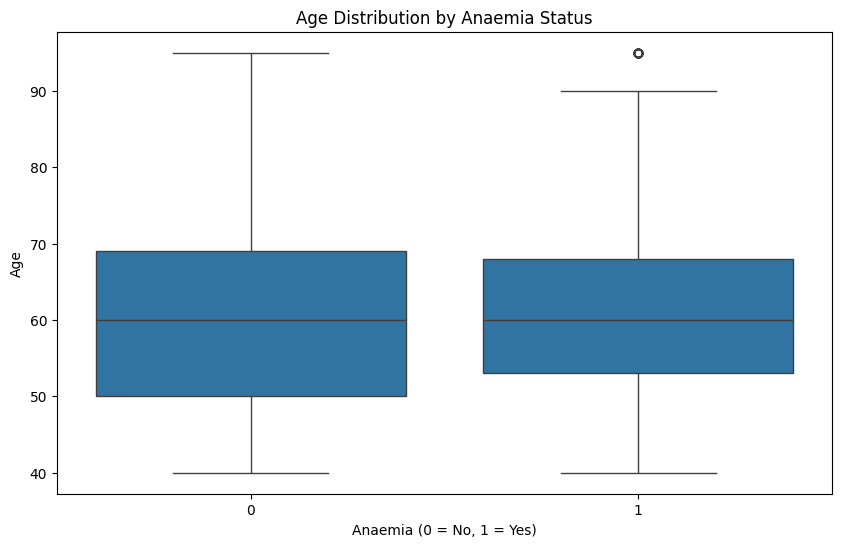

In [90]:
plt.figure(figsize=(10,6))
sns.boxplot(x='anaemia', y='age', data=df)
plt.title('Age Distribution by Anaemia Status')
plt.xlabel('Anaemia (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


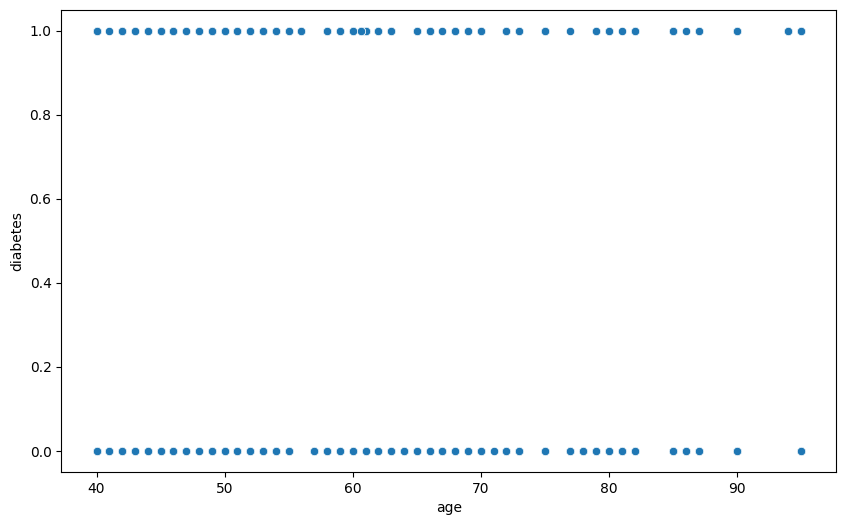

In [91]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='diabetes', data=df)

plt.show()

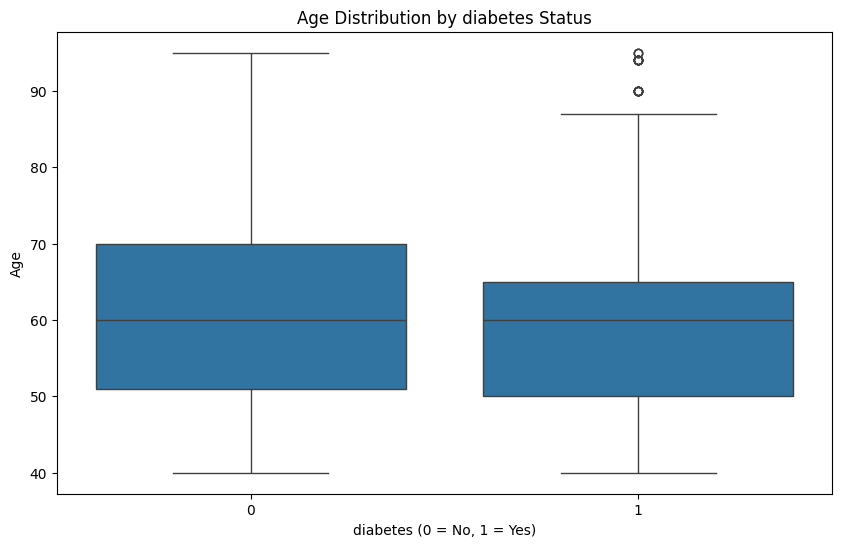

In [92]:
plt.figure(figsize=(10,6))
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age Distribution by diabetes Status')
plt.xlabel('diabetes (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


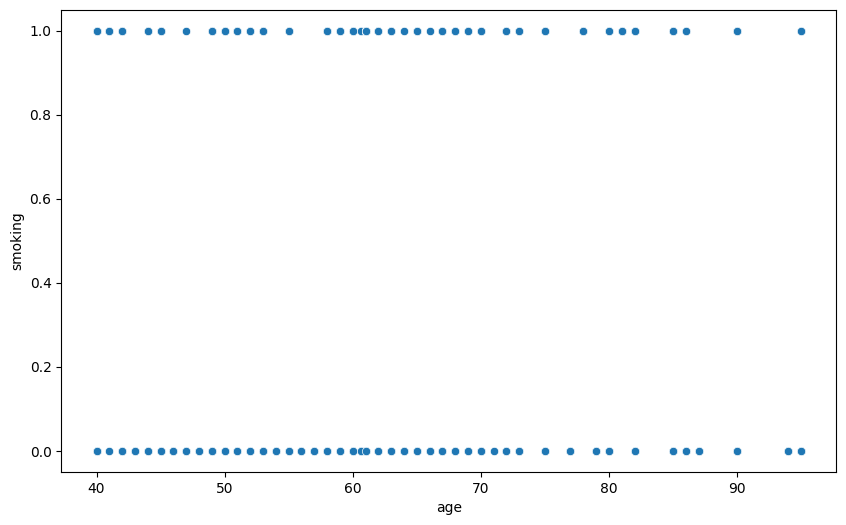

In [93]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='smoking', data=df)

plt.show()

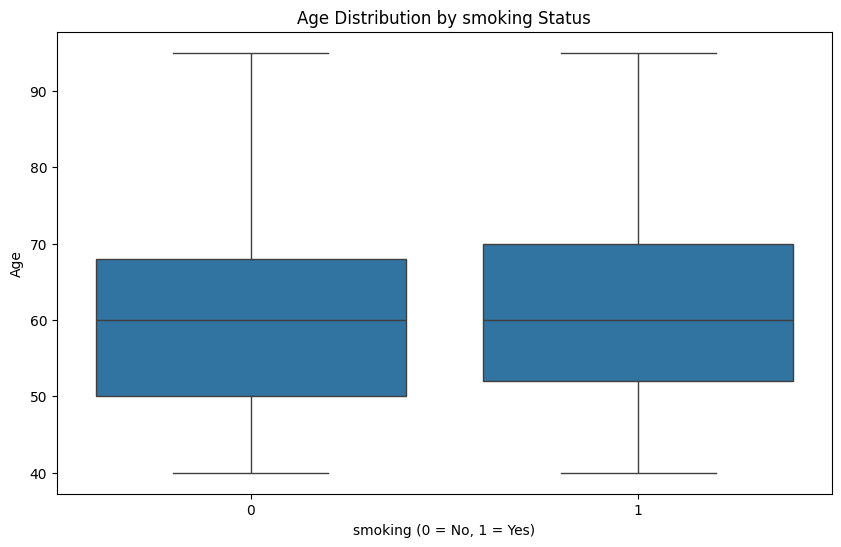

In [94]:
plt.figure(figsize=(10,6))
sns.boxplot(x='smoking', y='age', data=df)
plt.title('Age Distribution by smoking Status')
plt.xlabel('smoking (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


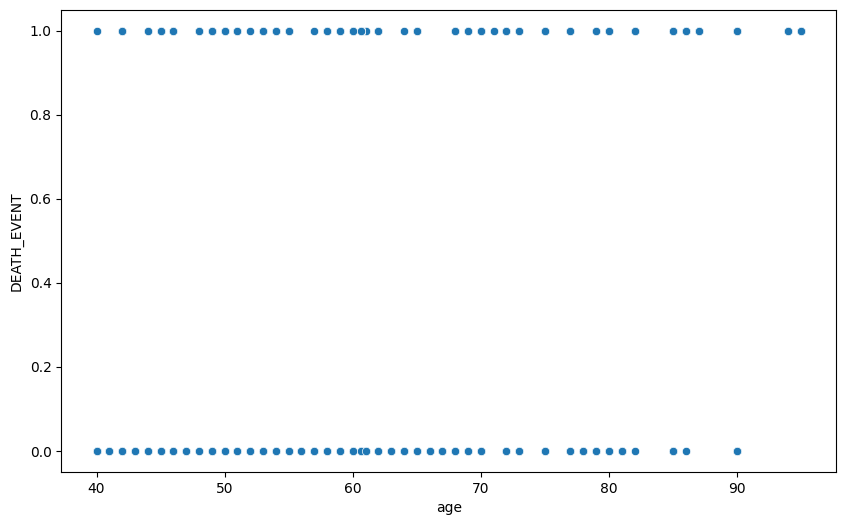

In [95]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='DEATH_EVENT', data=df)

plt.show()

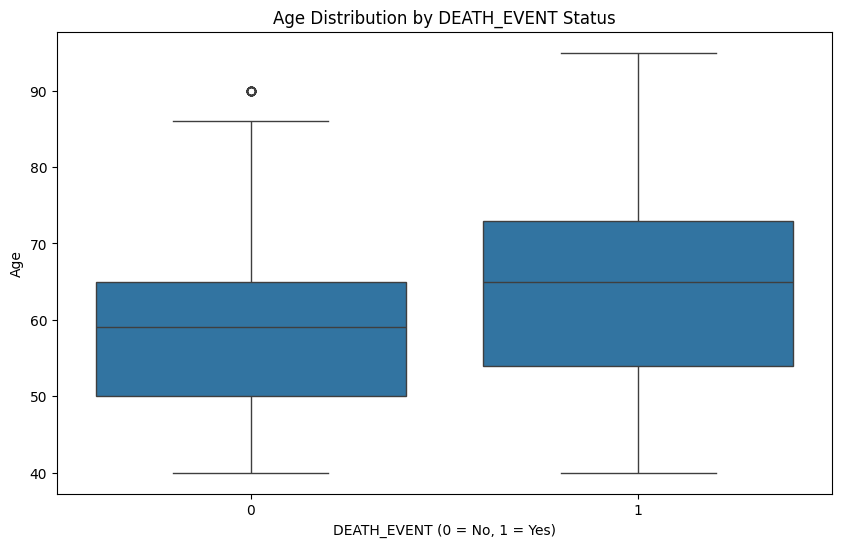

In [96]:
plt.figure(figsize=(10,6))
sns.boxplot(x='DEATH_EVENT', y='age', data=df)
plt.title('Age Distribution by DEATH_EVENT Status')
plt.xlabel('DEATH_EVENT (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


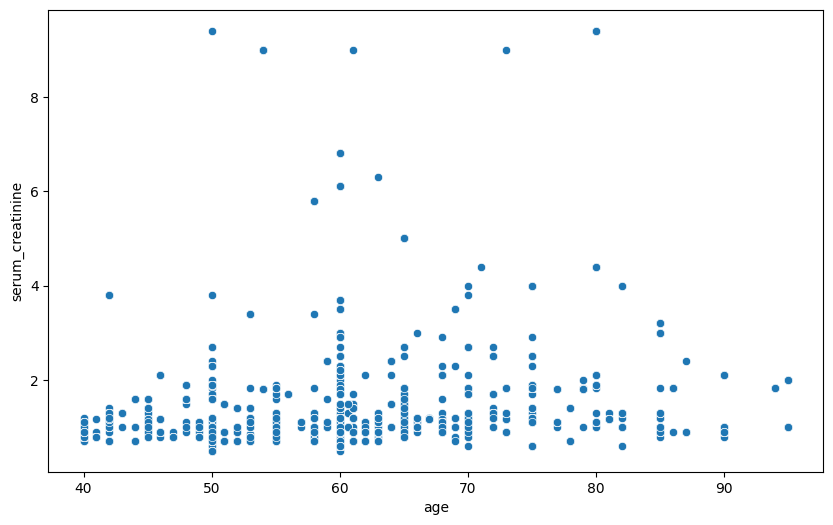

In [97]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='serum_creatinine', data=df)

plt.show()

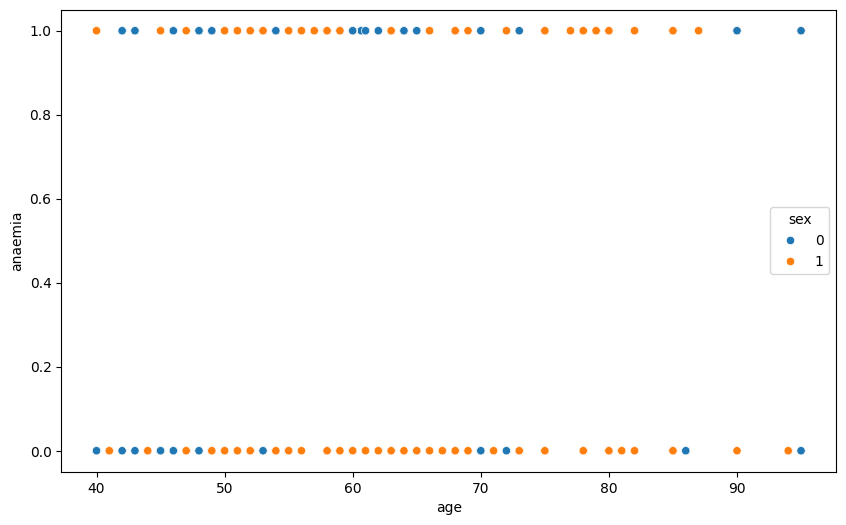

In [98]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age',y='anaemia', hue='sex',data=df)
plt.show()

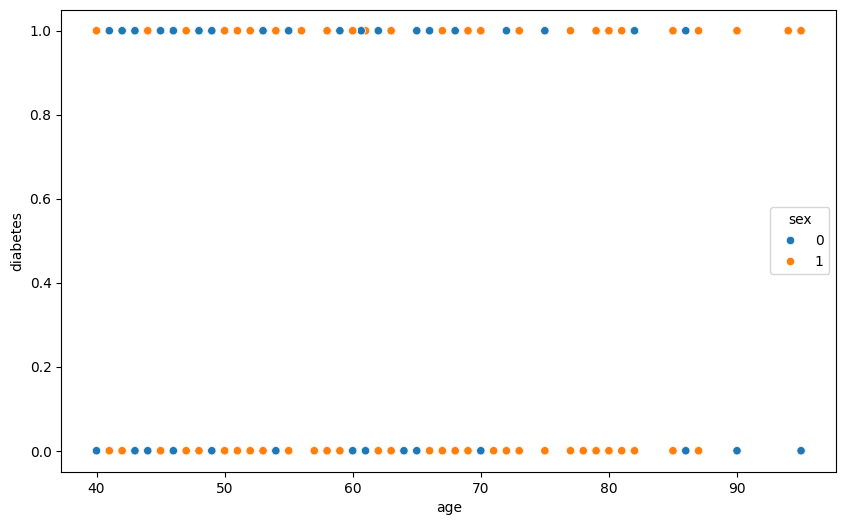

In [99]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age',y='diabetes', hue='sex',data=df)
plt.show()

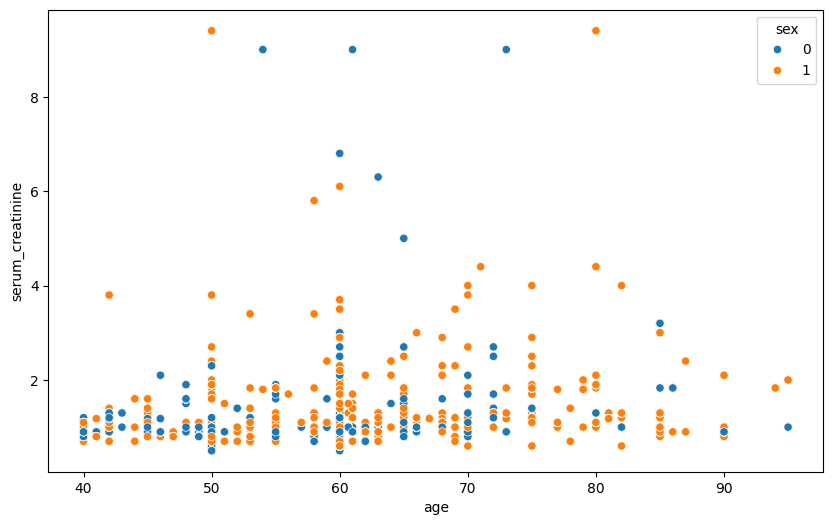

In [100]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age',y='serum_creatinine', hue='sex',data=df)
plt.show()

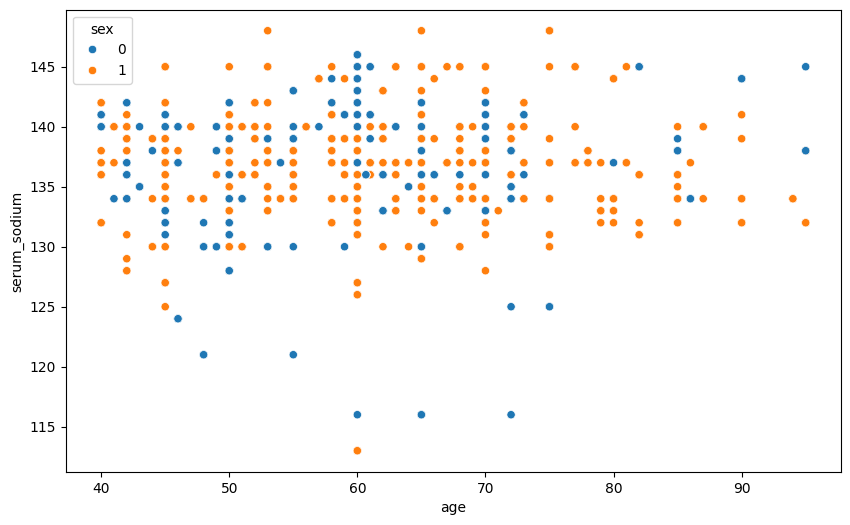

In [101]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age',y='serum_sodium', hue='sex',data=df)
plt.show()

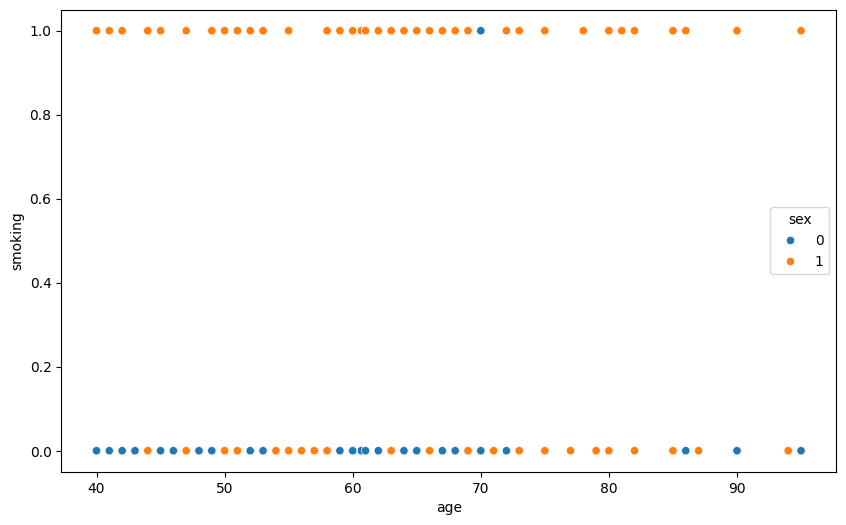

In [102]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age',y='smoking', hue='sex',data=df)
plt.show()

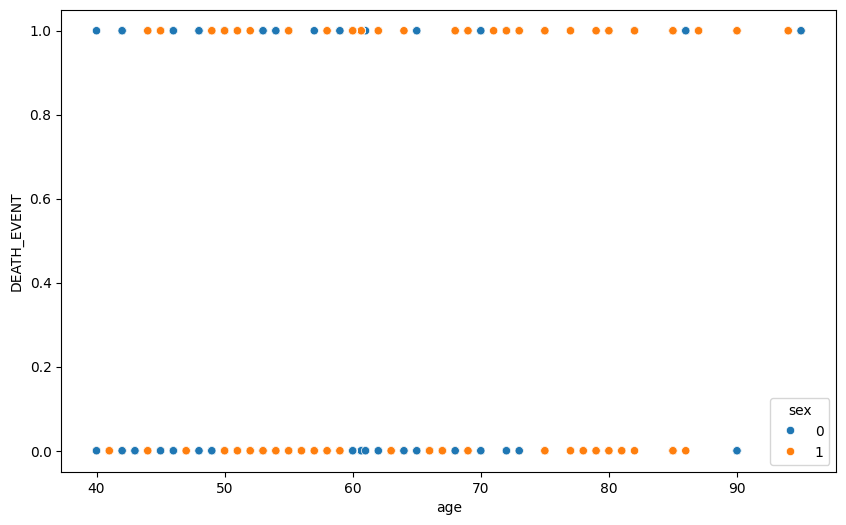

In [103]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age',y='DEATH_EVENT', hue='sex',data=df)
plt.show()

## **Data Preprocessing**

#### **Define Features X and Tanget y**

In [104]:
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

In [105]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.00,1.0,132,0,0,250
4996,60.0,1,582,0,30,1,127000.00,0.9,145,0,0,95
4997,95.0,1,112,0,40,1,196000.00,1.0,138,0,0,24
4998,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [106]:
y

0       0
1       0
2       0
3       0
4       1
       ..
4995    0
4996    0
4997    1
4998    1
4999    0
Name: DEATH_EVENT, Length: 5000, dtype: int64

#### **Data Scaling**

min_max_scaler = (X - X_min) / (X_max - X_min)

In [107]:
X.shape

(5000, 12)

In [108]:
X[['platelets']].shape

(5000, 1)

In [109]:
scaler = MinMaxScaler()

X['platelets'] = scaler.fit_transform(X[['platelets']])

In [110]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,55.0,0,748,0,45,0,0.288833,1.3,137,1,1,88
1,65.0,0,56,0,25,0,0.339314,5.0,130,1,0,207
2,45.0,0,582,1,38,0,0.356286,0.9,140,0,0,244
3,60.0,1,754,1,40,1,0.367196,1.2,126,1,0,90
4,95.0,1,582,0,30,0,0.528428,2.0,132,1,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,0.627834,1.0,132,0,0,250
4996,60.0,1,582,0,30,1,0.123530,0.9,145,0,0,95
4997,95.0,1,112,0,40,1,0.207177,1.0,138,0,0,24
4998,65.0,1,160,1,20,0,0.365984,2.7,116,0,0,8


#### **Data Splitting**

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

In [112]:
X_train.shape

(4000, 12)

In [113]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
4227,58.0,1,57,0,25,0,0.198691,1.3,132,1,1,205
4676,50.0,0,196,0,45,0,0.448418,1.6,136,1,1,285
800,50.0,0,369,0,40,0,0.215663,1.0,138,1,0,90
3671,42.0,0,64,0,40,0,0.198691,0.7,140,1,0,245
4193,42.0,0,102,0,25,0,0.265365,1.2,142,0,0,74
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,51.0,1,582,1,35,0,0.288833,1.5,136,1,1,145
466,65.0,1,135,0,35,1,0.179294,0.8,134,1,0,194
3092,50.0,1,111,0,20,0,0.224148,1.9,137,1,0,7
3772,80.0,0,805,0,38,0,0.288833,1.1,134,1,0,109


In [114]:
y_train.shape

(4000,)

In [115]:
y_train

4227    0
4676    0
800     0
3671    0
4193    0
       ..
4426    0
466     0
3092    1
3772    1
860     1
Name: DEATH_EVENT, Length: 4000, dtype: int64

In [116]:
X_test.shape

(1000, 12)

In [117]:
X_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
1501,65.000,1,335,0,35,1,0.254455,0.8,136,0,0,120
2586,72.000,1,110,0,25,0,0.301734,1.0,140,1,1,65
2653,70.000,1,143,0,60,0,0.395078,1.3,137,0,0,90
1055,68.000,1,546,0,25,1,0.170809,1.0,138,1,0,43
705,70.000,0,618,0,35,0,0.193842,1.1,134,1,1,245
...,...,...,...,...,...,...,...,...,...,...,...,...
4711,68.000,1,1021,1,35,0,0.298097,1.1,134,1,0,197
2313,80.000,0,148,1,38,0,0.150200,1.9,144,1,1,23
3214,60.667,1,151,1,40,1,0.213238,1.0,136,0,0,172
2732,59.000,1,129,0,45,1,0.408413,1.1,139,1,1,121


In [118]:
y_test.shape

(1000,)

In [119]:
y_test

1501    0
2586    1
2653    1
1055    1
705     0
       ..
4711    0
2313    1
3214    0
2732    0
1926    1
Name: DEATH_EVENT, Length: 1000, dtype: int64

## **Data Modeling**

In [120]:
# ---------------------- Models Dictionary ----------------------
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(probability=True),
    'LinearSVC': LinearSVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Bagging': BaggingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'XGBoost': XGBClassifier(verbosity=0)

}

In [121]:
# ---------------------- Train & Evaluate ----------------------
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (1)': report['1']['precision'],
        'Recall (1)': report['1']['recall'],
        'F1-score (1)': report['1']['f1-score']
    })

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [122]:
voting = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier(verbosity=0))
], voting='soft')
voting.fit(X_train, y_train)
y_voting = voting.predict(X_test)
rep = classification_report(y_test, y_voting, output_dict=True)
results.append({
    'Model': 'VotingClassifier',
    'Accuracy': accuracy_score(y_test, y_voting),
    'Precision (1)': rep['1']['precision'],
    'Recall (1)': rep['1']['recall'],
    'F1-score (1)': rep['1']['f1-score']
})

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [123]:
# ---------------------- Stacking Classifier ----------------------
stacking = StackingClassifier(estimators=[
    ('svc', SVC(probability=True)),
    ('knn', KNeighborsClassifier())
], final_estimator=LogisticRegression())
stacking.fit(X_train, y_train)
y_stacking = stacking.predict(X_test)
rep = classification_report(y_test, y_stacking, output_dict=True)
results.append({
    'Model': 'StackingClassifier',
    'Accuracy': accuracy_score(y_test, y_stacking),
    'Precision (1)': rep['1']['precision'],
    'Recall (1)': rep['1']['recall'],
    'F1-score (1)': rep['1']['f1-score']
})


In [124]:
df_results = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print(df_results)

                  Model  Accuracy  Precision (1)  Recall (1)  F1-score (1)
8               XGBoost     0.992       0.983553    0.990066      0.986799
5               Bagging     0.991       0.983498    0.986755      0.985124
9      VotingClassifier     0.991       0.980328    0.990066      0.985173
7           Extra Trees     0.990       0.977124    0.990066      0.983553
6         Random Forest     0.990       0.980263    0.986755      0.983498
4         Decision Tree     0.985       0.973597    0.976821      0.975207
3                   KNN     0.978       0.960526    0.966887      0.963696
10   StackingClassifier     0.977       0.960396    0.963576      0.961983
0   Logistic Regression     0.842       0.748276    0.718543      0.733108
2             LinearSVC     0.841       0.742373    0.725166      0.733668
1                   SVC     0.836       0.802632    0.605960      0.690566
